<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/AirFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airfoil Self-Noise Data Set
## Written by: Abiola Obembe
### Date : 2020-09-17
#### Objective: Predict Scaled sound pressure level, in decibels given the following attributes:
#### 1. Frequency, in Hertzs.
#### 2. Angle of attack, in degrees.
#### 3. Chord length, in meters.
#### 4. Free-stream velocity, in meters per second.
#### 5. Suction side displacement thickness, in meters.

## Import libraries

In [1]:
# import required depednecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")


Installtion completed successfully!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preprocessing

In [2]:
# load dataset and include column headers
dataset = pd.read_csv('airfoil_self_noise.csv',header= None)
cols = ['Frequency','AngleAttack','ChordLength','Velocity','Thickness','SoundPressure']

dataset.columns = cols
dataset.head()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness,SoundPressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
# Check shape of dataset and missing values
print("The shape of the dataset is:", (dataset.shape))
print("The number of rows in the dataset is:", str(dataset.shape[0]))
print("The number of columns in the dataset is:", str(dataset.shape[1]))

missing_values = dataset.isnull().sum().sum()

print("The number of missing values the dataset is:", str(missing_values))

The shape of the dataset is: (1503, 6)
The number of rows in the dataset is: 1503
The number of columns in the dataset is: 6
The number of missing values the dataset is: 0


In [4]:
# Check for data types
dataset.dtypes

Frequency          int64
AngleAttack      float64
ChordLength      float64
Velocity         float64
Thickness        float64
SoundPressure    float64
dtype: object

In [5]:
# Print dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Frequency      1503 non-null   int64  
 1   AngleAttack    1503 non-null   float64
 2   ChordLength    1503 non-null   float64
 3   Velocity       1503 non-null   float64
 4   Thickness      1503 non-null   float64
 5   SoundPressure  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [6]:
# Check statistics of dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
AngleAttack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
ChordLength,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Velocity,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
Thickness,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
SoundPressure,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


In [7]:
# Create a new datframe to work with
df_new = dataset
df_a = df_new.drop(['SoundPressure'], axis=1)
df_a.head()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [8]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(df_a))
zscore


array([[0.6620227 , 1.14640293, 1.79929926, 1.31293526, 0.64480461],
       [0.59856135, 1.14640293, 1.79929926, 1.31293526, 0.64480461],
       [0.51923465, 1.14640293, 1.79929926, 1.31293526, 0.64480461],
       ...,
       [0.353359  , 1.49044302, 0.37373954, 0.72334483, 3.17277251],
       [0.67066578, 1.49044302, 0.37373954, 0.72334483, 3.17277251],
       [1.08316459, 1.49044302, 0.37373954, 0.72334483, 3.17277251]])

In [9]:
print(np.where (zscore >3))

(array([  12,   13,   28,   47,   78,   79,   96,  173,  198,  199,  200,
        313,  314,  315,  466,  467,  482,  483,  524,  525,  540,  709,
        710,  711,  712,  713,  714,  715,  716,  717,  718,  719,  720,
        721,  722,  723,  724,  737,  750,  763,  776,  786,  969,  970,
        971,  980,  981,  982,  992,  993, 1005, 1006, 1015, 1016, 1017,
       1027, 1028, 1029, 1253, 1267, 1487, 1488, 1489, 1490, 1491, 1492,
       1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [10]:
# Check for correlation in dataset
dataset.corr()

,Frequency,AngleAttack,ChordLength,Velocity,Thickness,SoundPressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AngleAttack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
ChordLength,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SoundPressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


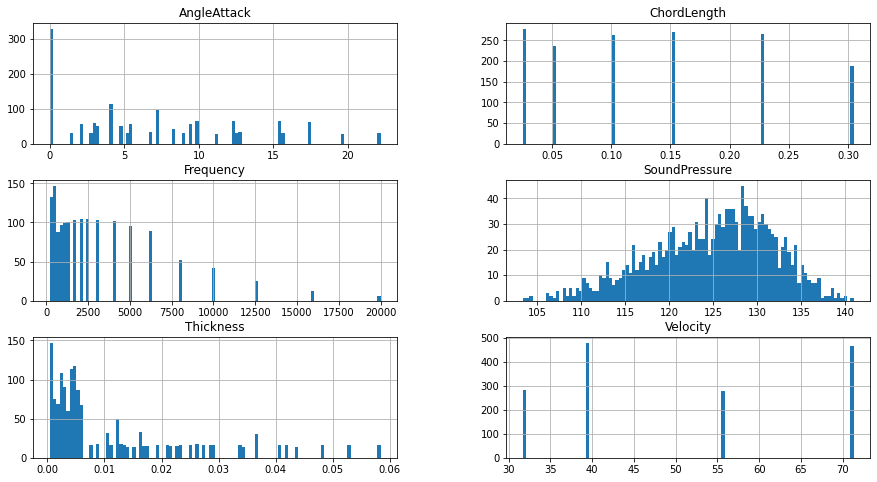

In [11]:
# Visualize histogram of dataset
dataset.hist(figsize= (15,8), bins= 100)
plt.show()

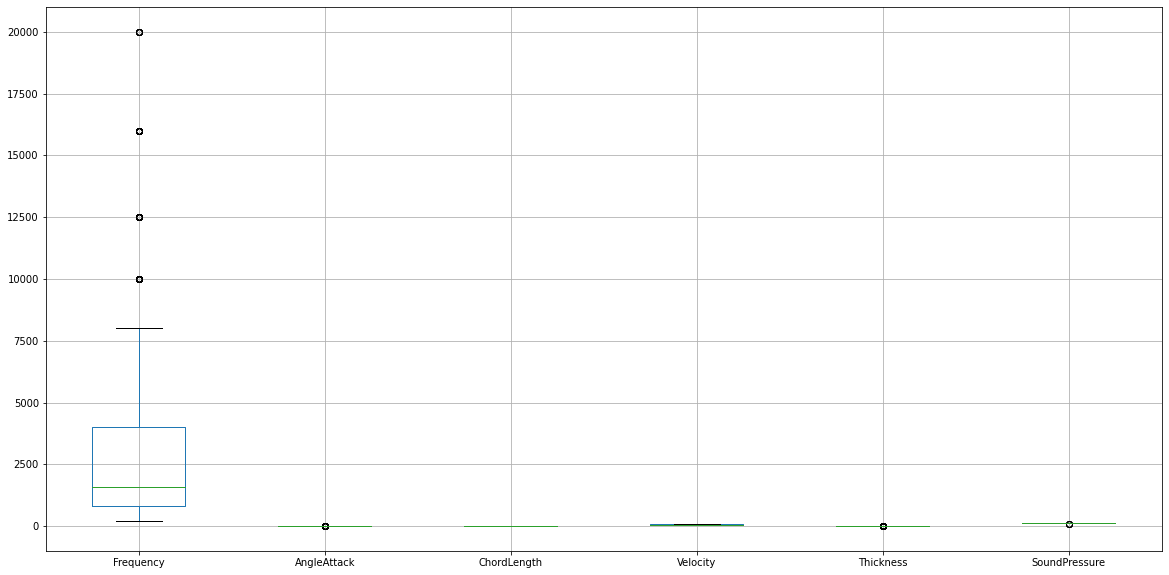

In [12]:
# Boxplot of dataframe
dataset.boxplot(figsize= (20,10) )
plt.show()

### Skewness Check
#### The high value of skewness implies the distribution is highly skewed. Specifically, the positive value implies poistively skewed distribution. The large kurtosis value indicates heavy tails/outliers. It is therfore important to transform the variables with high skewness to address the skewness.

The skewness of Frequency column is: 2.1370843370561032
The kurtosis of Frequency column is: 5.708685076629566


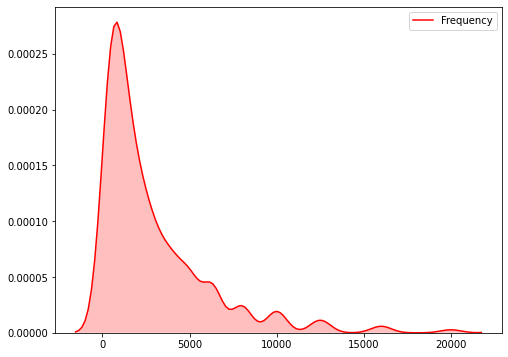

In [13]:
# Statistical analysis on Frequency column
print("The skewness of Frequency column is:", dataset['Frequency'].skew())
print("The kurtosis of Frequency column is:", dataset['Frequency'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Frequency'], shade=True, color="r")
plt.show()

The skewness of AngleAttack column is: 0.6891644015246552
The kurtosis of AngleAttack column is: -0.4129507932946681


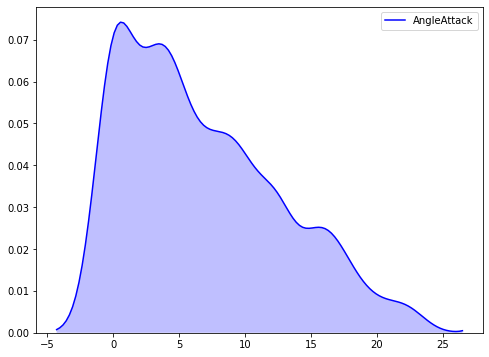

In [14]:
# Statistical analysis on AngleAttack column
print("The skewness of AngleAttack column is:", dataset['AngleAttack'].skew())
print("The kurtosis of AngleAttack column is:", dataset['AngleAttack'].kurtosis())

plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['AngleAttack'], shade=True, color="b")
plt.show()

The skewness of ChordLength column is: 0.4574574796795428
The kurtosis of ChordLengthcolumn is: -1.037964096539102


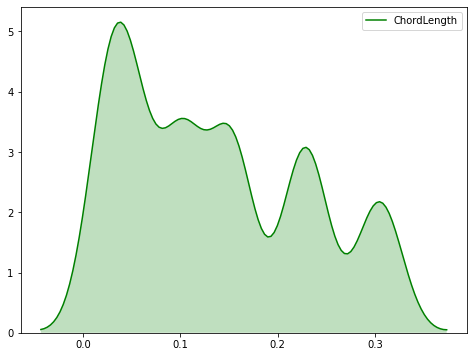

In [15]:
# Statistical analysis on ChordLength column
print("The skewness of ChordLength column is:", dataset['ChordLength'].skew())
print("The kurtosis of ChordLengthcolumn is:", dataset['ChordLength'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['ChordLength'], shade=True, color="g")
plt.show()

The skewness of Velocity column is: 0.23585241419124836
The kurtosis of Velocity column is: -1.5639512742591497


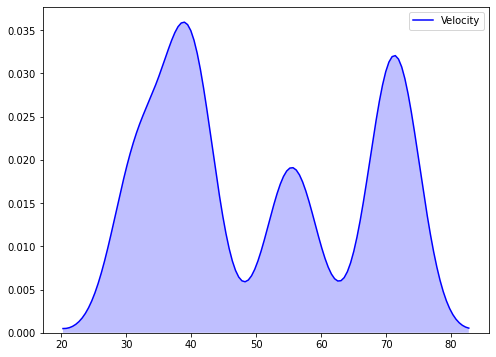

In [16]:
# Statistical analysis on Velocity column
print("The skewness of Velocity column is:", dataset['Velocity'].skew())
print("The kurtosis of Velocity column is:", dataset['Velocity'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Velocity'], shade=True, color="b")
plt.show()

The skewness of Thickness column is: 1.702164556088956
The kurtosis of Thickness column is: 2.218903124436664


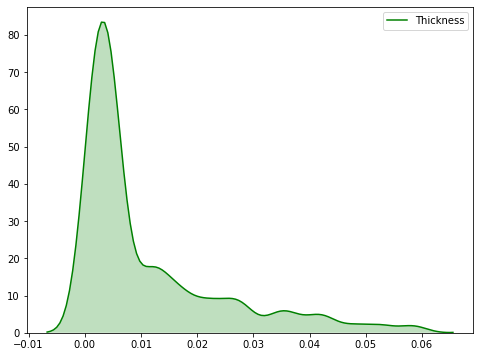

In [17]:
# Statistical analysis on Thickness column
print("The skewness of Thickness column is:", dataset['Thickness'].skew())
print("The kurtosis of Thickness column is:", dataset['Thickness'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['Thickness'], shade=True, color="g")
plt.show()

The skewness of SoundPressure column is: -0.41895218773468573
The kurtosis of SoundPressure column is: -0.31418730019313745


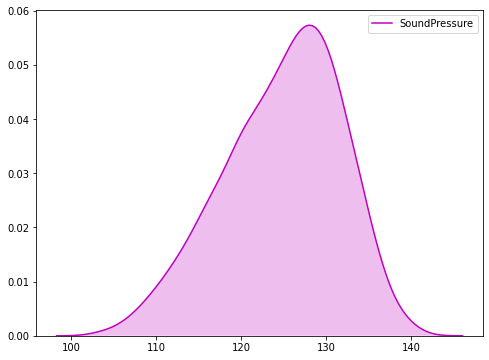

In [18]:
# Statistical analysis on SoundPressure column
print("The skewness of SoundPressure column is:", dataset['SoundPressure'].skew())
print("The kurtosis of SoundPressure column is:", dataset['SoundPressure'].kurtosis())
plt.figure(figsize= (8,6))
ax = sns.kdeplot(dataset['SoundPressure'], shade=True, color="m")
plt.show()

In [19]:
# diagnostic plot to confirm skewness/outliers
def diagnostic_plots(df,variable):
  # functin to plot a histogram and Q-Q plot 
  
  plt.figure(figsize = (15,6))
  plt.subplot(1,3,1)
  df[variable].hist()
  
  plt.subplot(1,3,2)
  stats.probplot(df[variable], dist = "norm", plot = plt)

  plt.subplot(1,3,3)
  df[variable].plot(kind = 'box')
  
  #diagnostic_plots(df,'Age') # how to use function
  
  plt.show()

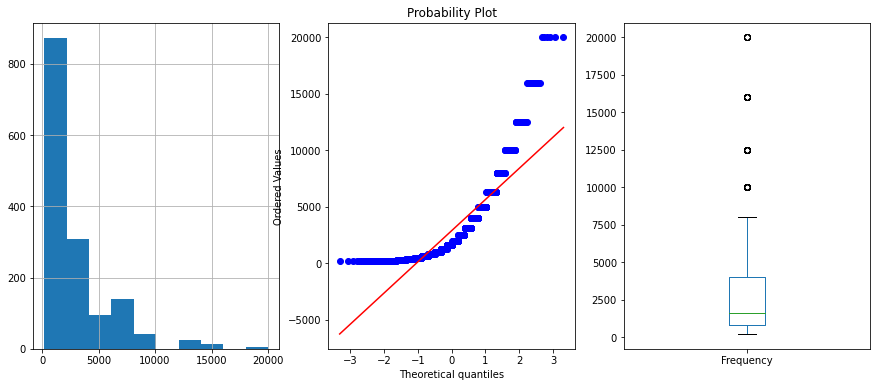

In [20]:
diagnostic_plots(dataset,'Frequency')

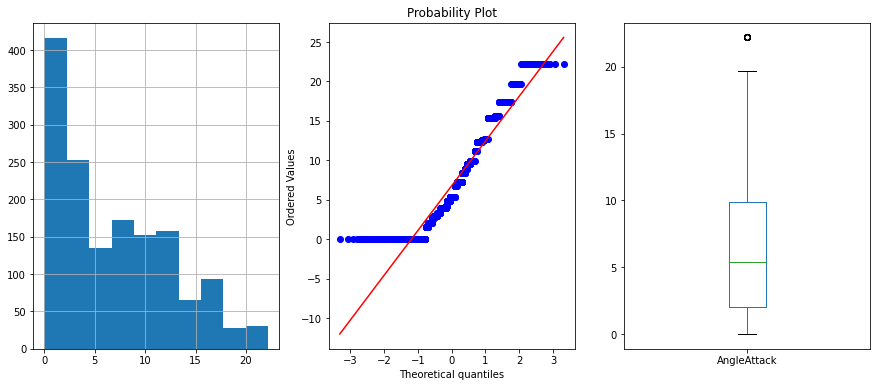

In [21]:
# Confirm skewness with Q-Q plot for AngleAttack
diagnostic_plots(dataset, 'AngleAttack')

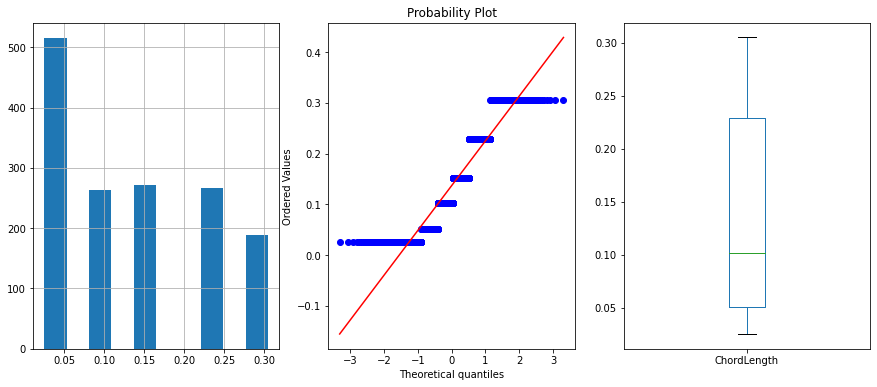

In [22]:
# Confirm skewness with Q-Q plot for ChordLength
diagnostic_plots(dataset, 'ChordLength')

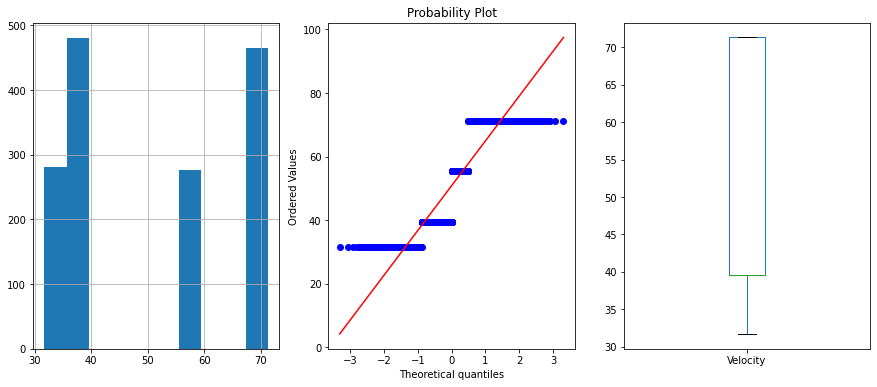

In [23]:
# Confirm skewness with Q-Q plot for Velocity
diagnostic_plots(dataset, 'Velocity')

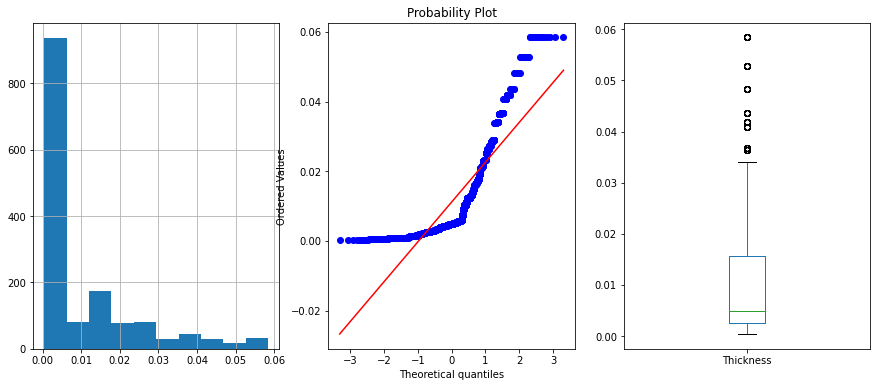

In [24]:
# Confirm skewness with Q-Q plot for Thickness
diagnostic_plots(dataset, 'Thickness')

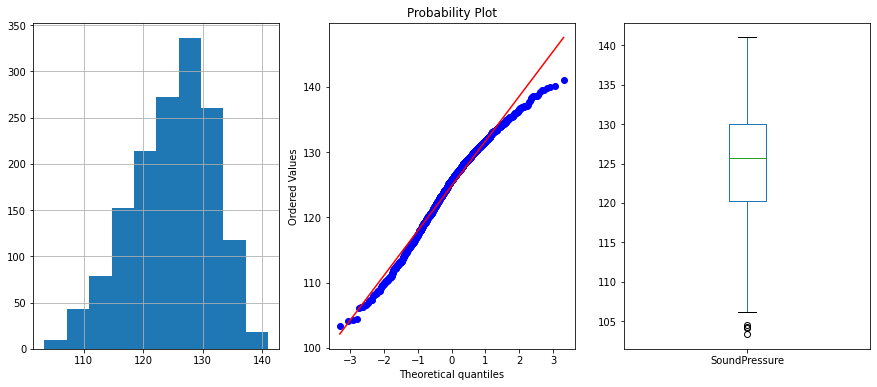

In [25]:
# Confirm skewness with Q-Q plot for target variable SondPressure
diagnostic_plots(dataset, 'SoundPressure')

In [26]:
#  Finding numerical and categorical columns from original dataframe
num_cols = df_a.select_dtypes(exclude ='object').columns.tolist()
cat_cols = df_a.select_dtypes(include='object').columns.tolist()

print(num_cols)
print(cat_cols)

['Frequency', 'AngleAttack', 'ChordLength', 'Velocity', 'Thickness']
[]


In [27]:
## For simplicity remove all data with outliers
df = dataset
df = df[(zscore <3).all(axis = 1)]
print("The shape of the original dataframe is :", df_a.shape)
print("The shape of the clean dataframe is :", df.shape)

deleted_entries = df_a.shape[0] - df.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (1503, 5)
The shape of the clean dataframe is : (1427, 6)
Entries deleted in the dataframe are : 76


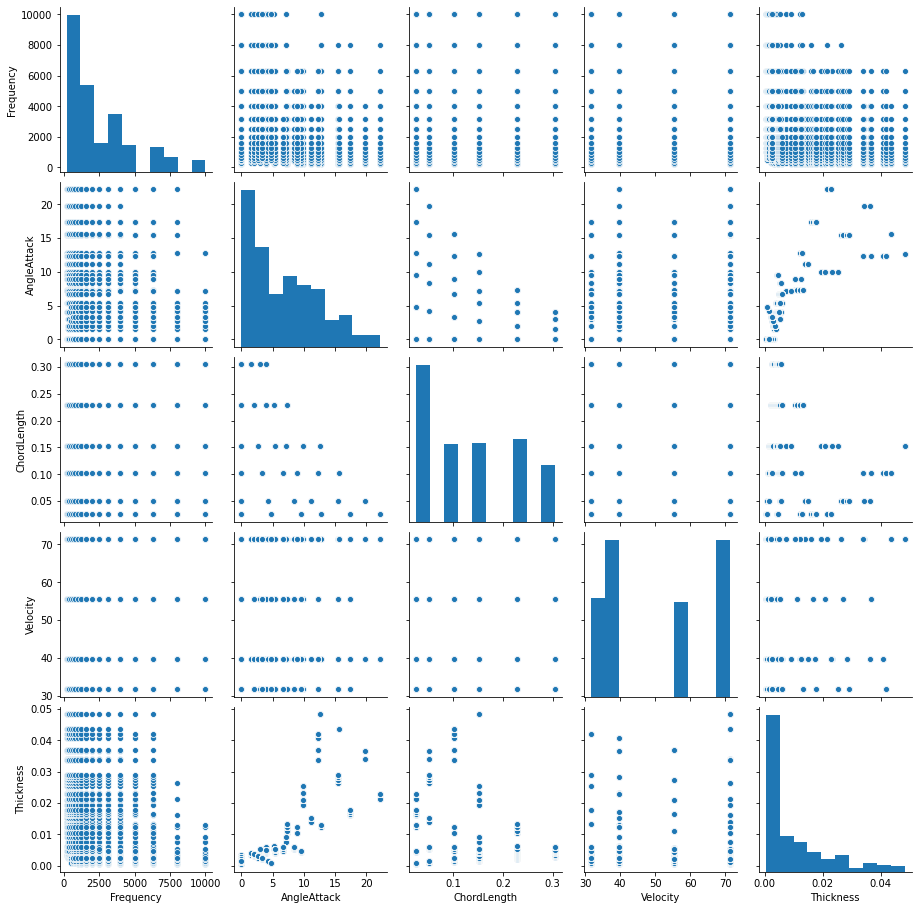

In [28]:
# pairplot on numerical variables
sns.pairplot(df[num_cols])
plt.show()

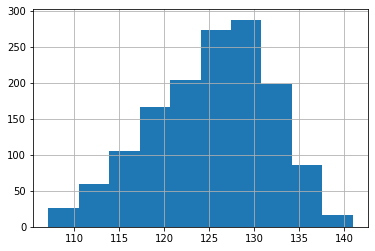

In [29]:
# Explore target variable
df['SoundPressure'].hist()
plt.show()

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Frequency')

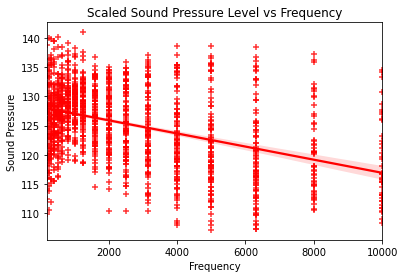

In [30]:
# Examine correlation between Frequency and target variable
plt.figure()
ax = sns.regplot( x = 'Frequency', y = 'SoundPressure', data = df, color = 'red', marker = '+')
ax.set( xlabel = 'Frequency', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Frequency')

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Velocity')

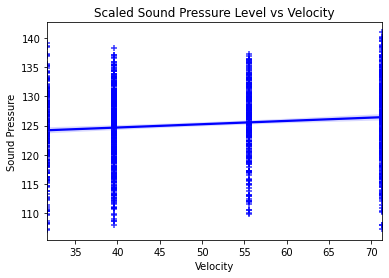

In [31]:
# Examine correlation between Velocity and target variable
plt.figure()
ax = sns.regplot( x = 'Velocity', y = 'SoundPressure', data = df, color = 'blue', marker = '+')
ax.set( xlabel = 'Velocity', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Velocity')

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Thickness')

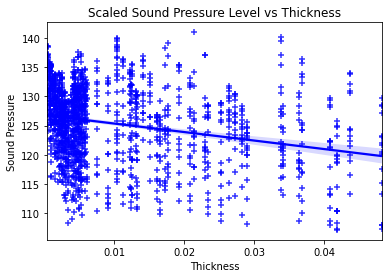

In [32]:
# Examine correlation between Thickness and target variable
plt.figure()
ax = sns.regplot( x = 'Thickness', y = 'SoundPressure', data = df, color = 'blue', marker = '+')
ax.set( xlabel = 'Thickness', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Thickness')

Text(0.5, 1.0, 'Scaled Sound Pressure Level vs Chord Length')

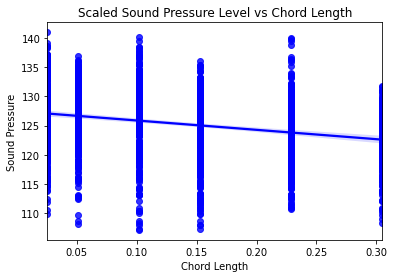

In [33]:
# Examine correlation between Chord Length and target variable
plt.figure()
ax = sns.regplot( x = 'ChordLength', y = 'SoundPressure', data = df, color = 'blue', marker = 'o')
ax.set( xlabel = 'Chord Length', ylabel = 'Sound Pressure')
ax.set_title('Scaled Sound Pressure Level vs Chord Length')

In [34]:
# Split dataframe into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)
print(X.shape)
print(y.shape)
print("The total number of rows in the feature X dataset is" + " " +  str(X.shape[0]))
print("The total number of attributes in X is" + " " +  str(X.shape[1]))
print("The total number of observations in y is" + " " + str(y.shape[0]))

(1427, 5)
(1427, 1)
The total number of rows in the feature X dataset is 1427
The total number of attributes in X is 5
The total number of observations in y is 1427


In [35]:
# Print first three rows of X
print(X[0:3,:])

[[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]]


In [36]:
# print first few rows of y
print(y[0:3])
type(y)

[[126.201]
 [125.201]
 [125.951]]


numpy.ndarray

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1141, 5)
(286, 5)
(1141, 1)
(286, 1)


In [38]:
print(X_train)

[[6.30000e+03 4.00000e+00 2.28600e-01 7.13000e+01 4.00603e-03]
 [6.30000e+02 1.12000e+01 5.08000e-02 7.13000e+01 1.40720e-02]
 [1.25000e+03 1.27000e+01 2.54000e-02 7.13000e+01 1.21808e-02]
 ...
 [1.00000e+03 1.74000e+01 2.54000e-02 7.13000e+01 1.61040e-02]
 [8.00000e+02 2.00000e+00 2.28600e-01 7.13000e+01 2.93031e-03]
 [1.00000e+03 1.27000e+01 2.54000e-02 7.13000e+01 1.21808e-02]]


## Regression Models

#### Multiple Linear Regression

In [39]:
# Build MLR model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Coefficients:' , regressor.coef_)
print('Intercept:', regressor.intercept_)

Coefficients: [[-1.53910176e-03 -4.20229024e-01 -3.34519981e+01  1.00891108e-01
  -1.17441750e+02]]
Intercept: [132.87045887]


In [40]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[121.93 116.18]
 [123.3  121.41]
 [117.17 111.14]
 [129.69 128.96]
 [128.27 136.54]
 [130.82 127.25]
 [123.65 125.21]
 [119.15 120.86]
 [123.03 122.4 ]
 [120.12 114.48]
 [129.74 128.44]
 [122.57 121.12]
 [126.14 128.25]
 [124.71 127.31]
 [126.3  127.32]
 [128.34 131.72]
 [123.49 128.68]
 [126.88 125.87]
 [123.36 118.34]
 [128.06 126.93]
 [125.14 138.27]
 [131.62 130.14]
 [128.61 131.8 ]
 [121.87 120.51]
 [124.14 128.42]
 [119.66 113.31]
 [126.58 126.84]
 [125.99 127.93]
 [116.84 120.61]
 [125.22 128.68]
 [122.46 121.4 ]
 [125.61 126.65]
 [123.38 123.42]
 [132.15 125.45]
 [121.37 119.17]
 [126.37 114.04]
 [120.41 118.13]
 [127.34 128.45]
 [120.43 115.3 ]
 [132.58 127.4 ]
 [130.04 134.05]
 [128.76 131.45]
 [126.72 124.17]
 [126.12 123.97]
 [129.96 121.62]
 [117.84 119.65]
 [127.12 127.47]
 [118.74 113.33]
 [125.69 119.11]
 [122.6  124.45]
 [124.09 124.11]
 [127.6  125.74]
 [120.92 117.5 ]
 [112.72 110.22]
 [119.09 115.22]
 [121.04 119.78]
 [123.94 125.72]
 [124.39 130.99]
 [127.09 127.5

In [41]:
# Evaluate MLR model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train, y_train))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_train,y_hat))


Residual sum of square for training set: 21.99 
Variance score for training set: 0.49
R2- score for test set: 0.49


In [42]:
# Evaluate MLR model for test set

print("Residual sum of square for test set: %.2f " % np.mean((y_pred -y_test)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test, y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 22.64 
Variance score for test set: 0.49
R2- score for test set: 0.49


#### Polynomial Regression

In [43]:
# Training the Polynomial Regression model on the training dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
print('Coefficients:' , regressor.coef_)
print('Intercept:', regressor.intercept_)


Coefficients: [[-8.33e-02  6.31e-03  1.07e+00  3.09e+01 -3.49e-01  4.72e+02 -1.03e-06
  -1.29e-04 -4.33e-02  7.76e-05 -5.33e-01 -3.82e-02 -8.08e+00 -2.98e-02
  -1.23e+02 -2.98e+02  1.80e+00  4.58e+01  2.36e-03  4.75e+01 -4.72e+01
   4.14e-11 -1.16e-08  1.67e-06 -7.41e-10  3.51e-05  3.44e-06 -7.53e-04
   2.07e-06  1.23e-02  5.24e-02  3.29e-05  9.66e-01 -6.32e-07 -1.93e-03
   2.31e+00  5.06e-04  8.60e-01 -5.68e-05  5.83e+00  2.27e+01  6.80e-02
  -1.56e+02  2.68e-04 -1.96e+00 -8.07e+02  3.83e+02 -4.05e-01  4.32e+01
  -1.30e-02 -1.31e+02  4.02e+00  6.54e-06 -1.31e-01  3.31e+02 -2.92e+00]]
Intercept: [127.07]


In [44]:
# Evaluate MLR model for training set
y_hat = regressor.predict(poly_reg.transform(X_train))
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(poly_reg.transform(X_train), y_train))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 10.22 
Variance score for training set: 0.76
R2- score for training set: 0.76


In [45]:
# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[120.59 116.18]
 [122.76 121.41]
 [108.2  111.14]
 [128.87 128.96]
 [135.59 136.54]
 [127.36 127.25]
 [124.59 125.21]
 [126.84 120.86]
 [123.5  122.4 ]
 [115.71 114.48]
 [127.45 128.44]
 [120.2  121.12]
 [127.92 128.25]
 [124.8  127.31]
 [133.76 127.32]
 [129.89 131.72]
 [128.97 128.68]
 [127.69 125.87]
 [121.38 118.34]
 [131.84 126.93]
 [123.95 138.27]
 [130.26 130.14]
 [131.68 131.8 ]
 [124.73 120.51]
 [124.63 128.42]
 [114.85 113.31]
 [129.92 126.84]
 [132.46 127.93]
 [115.29 120.61]
 [125.5  128.68]
 [122.37 121.4 ]
 [130.88 126.65]
 [125.73 123.42]
 [124.95 125.45]
 [123.52 119.17]
 [123.28 114.04]
 [118.35 118.13]
 [129.1  128.45]
 [115.1  115.3 ]
 [129.73 127.4 ]
 [129.27 134.05]
 [127.97 131.45]
 [128.09 124.17]
 [128.56 123.97]
 [127.45 121.62]
 [126.69 119.65]
 [128.93 127.47]
 [111.78 113.33]
 [125.38 119.11]
 [125.43 124.45]
 [123.81 124.11]
 [128.38 125.74]
 [115.77 117.5 ]
 [114.81 110.22]
 [115.58 115.22]
 [119.24 119.78]
 [122.39 125.72]
 [129.55 130.99]
 [125.36 127.5

In [46]:
# Evaluate Polynomial model for test set
y_pred = regressor.predict(poly_reg.transform(X_test))
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(poly_reg.transform(X_test), y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 14.23 
Variance score for test set: 0.68
R2- score for test set: 0.68


#### SVM Regression: Linear

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)
print(X_train_sc)

[[ 1.56 -0.46  0.97  1.31 -0.54]
 [-0.79  0.79 -0.93  1.31  0.32]
 [-0.53  1.04 -1.2   1.31  0.16]
 ...
 [-0.63  1.86 -1.2   1.31  0.5 ]
 [-0.72 -0.8   0.97  1.31 -0.64]
 [-0.63  1.04 -1.2   1.31  0.16]]


In [48]:
# Build and train linear SVM model
from sklearn.svm import LinearSVR
regressor = LinearSVR()
regressor.fit(X_train_sc, y_train_sc)
print(regressor.coef_)
print(regressor.intercept_)

[-0.65 -0.35 -0.55  0.24 -0.31]
[0.01]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# Evaluate the Linear SVM model for training set
y_hat = sc_y.inverse_transform(regressor.predict(X_train_sc))
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train_sc, y_train_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_train,y_hat))



Residual sum of square for training set: 70.41 
Variance score for training set: 0.47
R2- score for test set: 0.47


In [50]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(X_test_sc))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[121.85 116.18]
 [123.19 121.41]
 [115.94 111.14]
 [129.97 128.96]
 [128.72 136.54]
 [131.86 127.25]
 [123.43 125.21]
 [119.31 120.86]
 [122.77 122.4 ]
 [118.9  114.48]
 [130.94 128.44]
 [121.93 121.12]
 [126.6  128.25]
 [124.66 127.31]
 [125.72 127.32]
 [128.55 131.72]
 [123.49 128.68]
 [127.18 125.87]
 [122.98 118.34]
 [128.55 126.93]
 [125.99 138.27]
 [132.26 130.14]
 [128.93 131.8 ]
 [121.63 120.51]
 [124.22 128.42]
 [118.29 113.31]
 [126.57 126.84]
 [125.37 127.93]
 [116.22 120.61]
 [125.39 128.68]
 [121.96 121.4 ]
 [124.93 126.65]
 [124.16 123.42]
 [133.61 125.45]
 [121.09 119.17]
 [127.4  114.04]
 [119.36 118.13]
 [127.31 128.45]
 [119.51 115.3 ]
 [133.35 127.4 ]
 [131.2  134.05]
 [130.07 131.45]
 [126.98 124.17]
 [126.79 123.97]
 [130.71 121.62]
 [117.81 119.65]
 [127.94 127.47]
 [117.68 113.33]
 [125.67 119.11]
 [121.95 124.45]
 [123.61 124.11]
 [128.36 125.74]
 [118.99 117.5 ]
 [110.54 110.22]
 [118.03 115.22]
 [119.96 119.78]
 [123.59 125.72]
 [124.45 130.99]
 [126.82 127.5

In [51]:
# Evaluate the linear SVM model for test set
y_pred =sc_y.inverse_transform(regressor.predict(X_test_sc))
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test_sc, y_test_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 72.46 
Variance score for test set: 0.47
R2- score for test set: 0.47


In [52]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: Data

Test-predictions accuracy: -854.8921340738225


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: Convergence

#### SVM Regression: rbf

In [53]:
# Build and train SVM model for rbf kernel
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_sc, y_train_sc)
print(regressor.get_params)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [54]:
# Evaluate the SVM model for rbf kernel for training set
y_hat = sc_y.inverse_transform(regressor.predict(X_train_sc))
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train_sc, y_train_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_train,y_hat))



Residual sum of square for training set: 74.25 
Variance score for training set: 0.80
R2- score for test set: 0.80


In [55]:
# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(X_test_sc))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[118.87 116.18]
 [123.07 121.41]
 [108.74 111.14]
 [128.58 128.96]
 [135.52 136.54]
 [129.24 127.25]
 [125.09 125.21]
 [122.09 120.86]
 [123.28 122.4 ]
 [116.97 114.48]
 [128.54 128.44]
 [119.37 121.12]
 [128.08 128.25]
 [125.06 127.31]
 [129.71 127.32]
 [129.02 131.72]
 [129.02 128.68]
 [128.39 125.87]
 [118.47 118.34]
 [131.42 126.93]
 [126.02 138.27]
 [130.2  130.14]
 [131.16 131.8 ]
 [123.45 120.51]
 [125.88 128.42]
 [114.96 113.31]
 [130.07 126.84]
 [128.9  127.93]
 [115.24 120.61]
 [126.38 128.68]
 [122.31 121.4 ]
 [127.86 126.65]
 [123.12 123.42]
 [128.08 125.45]
 [122.69 119.17]
 [124.86 114.04]
 [119.01 118.13]
 [128.91 128.45]
 [114.71 115.3 ]
 [130.22 127.4 ]
 [131.49 134.05]
 [127.82 131.45]
 [127.99 124.17]
 [128.09 123.97]
 [128.84 121.62]
 [120.43 119.65]
 [129.01 127.47]
 [113.82 113.33]
 [123.27 119.11]
 [125.61 124.45]
 [124.31 124.11]
 [129.82 125.74]
 [118.38 117.5 ]
 [112.74 110.22]
 [116.48 115.22]
 [119.68 119.78]
 [124.58 125.72]
 [130.57 130.99]
 [126.31 127.5

In [56]:
# Evaluate the SVM model using rbf kernel for test set
y_pred =sc_y.inverse_transform(regressor.predict(X_test_sc))
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test_sc, y_test_sc))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 77.73 
Variance score for test set: 0.74
R2- score for test set: 0.74


In [57]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test-predictions accuracy: 0.12493582700343764


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#### Decision Tree Regression

In [58]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
print(regressor)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


In [59]:
# Evaluate Decision Tree model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train, y_train))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 85.50 
Variance score for training set: 1.00
R2- score for training set: 1.00


In [60]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[114.26 116.18]
 [121.53 121.41]
 [112.06 111.14]
 [129.   128.96]
 [136.83 136.54]
 [128.95 127.25]
 [125.5  125.21]
 [120.51 120.86]
 [123.45 122.4 ]
 [110.45 114.48]
 [130.19 128.44]
 [120.03 121.12]
 [128.4  128.25]
 [126.96 127.31]
 [125.11 127.32]
 [131.26 131.72]
 [130.09 128.68]
 [126.86 125.87]
 [118.05 118.34]
 [120.33 126.93]
 [126.   138.27]
 [130.64 130.14]
 [131.81 131.8 ]
 [119.04 120.51]
 [127.44 128.42]
 [114.08 113.31]
 [133.77 126.84]
 [125.48 127.93]
 [116.02 120.61]
 [128.26 128.68]
 [120.75 121.4 ]
 [122.68 126.65]
 [120.72 123.42]
 [126.15 125.45]
 [120.32 119.17]
 [114.71 114.04]
 [119.63 118.13]
 [128.18 128.45]
 [116.72 115.3 ]
 [123.58 127.4 ]
 [133.06 134.05]
 [131.21 131.45]
 [124.83 124.17]
 [129.93 123.97]
 [119.51 121.62]
 [122.   119.65]
 [129.97 127.47]
 [114.93 113.33]
 [118.   119.11]
 [125.47 124.45]
 [125.57 124.11]
 [125.35 125.74]
 [120.53 117.5 ]
 [110.91 110.22]
 [112.67 115.22]
 [120.04 119.78]
 [123.46 125.72]
 [127.01 130.99]
 [126.99 127.5

In [61]:
# Evaluate the Decision Tree Model for test set
y_pred =regressor.predict(X_test)
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test, y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 85.94 
Variance score for test set: 0.84
R2- score for test set: 0.84


In [62]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

Test-predictions accuracy: 0.5944750464294166


#### Random Forest Regression

In [63]:
# Training the Random Forest Regression model on the training dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 1 )
regressor.fit(X_train, y_train)
print(regressor)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [64]:
# Evaluate Random Forest Regression model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train, y_train))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 82.26 
Variance score for training set: 0.98
R2- score for training set: 0.98


In [65]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[116.73 116.18]
 [121.63 121.41]
 [111.46 111.14]
 [128.47 128.96]
 [135.48 136.54]
 [127.67 127.25]
 [125.13 125.21]
 [122.68 120.86]
 [123.98 122.4 ]
 [115.21 114.48]
 [129.62 128.44]
 [119.4  121.12]
 [128.01 128.25]
 [126.87 127.31]
 [129.26 127.32]
 [129.95 131.72]
 [129.81 128.68]
 [126.27 125.87]
 [117.37 118.34]
 [123.99 126.93]
 [129.03 138.27]
 [129.45 130.14]
 [132.04 131.8 ]
 [120.73 120.51]
 [127.49 128.42]
 [114.33 113.31]
 [131.65 126.84]
 [129.08 127.93]
 [116.8  120.61]
 [128.92 128.68]
 [122.45 121.4 ]
 [123.28 126.65]
 [122.11 123.42]
 [125.79 125.45]
 [121.14 119.17]
 [114.64 114.04]
 [119.43 118.13]
 [127.93 128.45]
 [117.26 115.3 ]
 [128.   127.4 ]
 [133.19 134.05]
 [129.88 131.45]
 [124.25 124.17]
 [125.62 123.97]
 [121.57 121.62]
 [122.14 119.65]
 [129.7  127.47]
 [115.07 113.33]
 [121.8  119.11]
 [125.59 124.45]
 [125.37 124.11]
 [126.12 125.74]
 [118.31 117.5 ]
 [111.24 110.22]
 [115.13 115.22]
 [120.83 119.78]
 [122.63 125.72]
 [128.95 130.99]
 [126.67 127.5

In [66]:
# Evaluate the Random Forest Regression Model for test set
y_pred =regressor.predict(X_test)
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test, y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 82.06 
Variance score for test set: 0.91
R2- score for test set: 0.91


In [67]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

Test-predictions accuracy: 0.738194740749176


#### XGBoost Regression

In [68]:
# Build and Train the XGBoost Regression model on training set
import xgboost  
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators= 200)
regressor.fit(X_train, y_train)
print(regressor)

[19:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [69]:
# Evaluate XGBoost Regression model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 80.04 
R2- score for training set: 0.92


In [70]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[117.32 116.18]
 [123.23 121.41]
 [108.35 111.14]
 [129.82 128.96]
 [135.74 136.54]
 [128.89 127.25]
 [126.3  125.21]
 [123.72 120.86]
 [122.91 122.4 ]
 [114.59 114.48]
 [130.17 128.44]
 [120.45 121.12]
 [128.12 128.25]
 [124.99 127.31]
 [131.47 127.32]
 [130.07 131.72]
 [131.27 128.68]
 [127.16 125.87]
 [118.   118.34]
 [126.65 126.93]
 [127.51 138.27]
 [130.35 130.14]
 [131.58 131.8 ]
 [123.3  120.51]
 [128.12 128.42]
 [113.92 113.31]
 [131.41 126.84]
 [130.33 127.93]
 [119.19 120.61]
 [127.42 128.68]
 [122.68 121.4 ]
 [129.09 126.65]
 [121.75 123.42]
 [129.16 125.45]
 [123.65 119.17]
 [114.91 114.04]
 [119.26 118.13]
 [128.85 128.45]
 [116.69 115.3 ]
 [128.72 127.4 ]
 [132.71 134.05]
 [130.71 131.45]
 [124.58 124.17]
 [125.71 123.97]
 [122.79 121.62]
 [121.4  119.65]
 [127.58 127.47]
 [111.86 113.33]
 [121.13 119.11]
 [125.27 124.45]
 [124.83 124.11]
 [126.49 125.74]
 [115.63 117.5 ]
 [112.11 110.22]
 [117.61 115.22]
 [119.16 119.78]
 [124.32 125.72]
 [132.54 130.99]
 [127.94 127.5

In [71]:
# Evaluate the XGBoost Regression Model for test set
y_pred =regressor.predict(X_test)

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

R2- score for test set: 0.88


In [72]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)

[19:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

#### CatBoost Regression

In [73]:
!pip install catboost
print("Installation complete!")

Installation complete!


In [74]:
# Build and Train the CatBoost Regression model on training set
import catboost 
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)
print(regressor)

Learning rate set to 0.039957
0:	learn: 6.4203460	total: 47.3ms	remaining: 47.3s
1:	learn: 6.3029708	total: 48.6ms	remaining: 24.2s
2:	learn: 6.1692491	total: 49.2ms	remaining: 16.4s
3:	learn: 6.0770382	total: 49.9ms	remaining: 12.4s
4:	learn: 5.9481343	total: 50.8ms	remaining: 10.1s
5:	learn: 5.8372294	total: 51.5ms	remaining: 8.53s
6:	learn: 5.7384235	total: 52.2ms	remaining: 7.41s
7:	learn: 5.6414475	total: 52.9ms	remaining: 6.57s
8:	learn: 5.5390282	total: 53.7ms	remaining: 5.91s
9:	learn: 5.4432572	total: 54.4ms	remaining: 5.38s
10:	learn: 5.3537772	total: 55.1ms	remaining: 4.95s
11:	learn: 5.2944560	total: 56ms	remaining: 4.61s
12:	learn: 5.1972246	total: 56.7ms	remaining: 4.3s
13:	learn: 5.1193670	total: 57.5ms	remaining: 4.05s
14:	learn: 5.0603132	total: 58.2ms	remaining: 3.82s
15:	learn: 4.9732606	total: 58.9ms	remaining: 3.62s
16:	learn: 4.8873160	total: 59.7ms	remaining: 3.45s
17:	learn: 4.8047960	total: 60.4ms	remaining: 3.29s
18:	learn: 4.7237804	total: 61.1ms	remaining: 3

In [75]:
# Evaluate CatBoost Regression model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))

from sklearn.metrics import r2_score
print("R2- score for training set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 83.60 
R2- score for training set: 0.99


In [76]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[116.83 116.18]
 [122.25 121.41]
 [111.16 111.14]
 [128.82 128.96]
 [136.81 136.54]
 [128.62 127.25]
 [126.07 125.21]
 [120.12 120.86]
 [122.18 122.4 ]
 [114.5  114.48]
 [129.24 128.44]
 [120.09 121.12]
 [128.14 128.25]
 [126.17 127.31]
 [132.12 127.32]
 [130.59 131.72]
 [129.5  128.68]
 [127.32 125.87]
 [117.28 118.34]
 [126.48 126.93]
 [130.84 138.27]
 [130.32 130.14]
 [132.2  131.8 ]
 [120.28 120.51]
 [128.94 128.42]
 [114.08 113.31]
 [130.12 126.84]
 [129.88 127.93]
 [117.53 120.61]
 [127.71 128.68]
 [122.33 121.4 ]
 [128.12 126.65]
 [123.15 123.42]
 [126.05 125.45]
 [123.49 119.17]
 [113.53 114.04]
 [118.78 118.13]
 [127.96 128.45]
 [116.84 115.3 ]
 [125.13 127.4 ]
 [133.57 134.05]
 [131.32 131.45]
 [123.82 124.17]
 [125.47 123.97]
 [123.25 121.62]
 [118.33 119.65]
 [128.02 127.47]
 [113.28 113.33]
 [119.98 119.11]
 [124.92 124.45]
 [124.69 124.11]
 [124.88 125.74]
 [116.93 117.5 ]
 [111.53 110.22]
 [116.41 115.22]
 [118.91 119.78]
 [125.   125.72]
 [132.1  130.99]
 [126.46 127.5

In [77]:
# Evaluate the CatBoost Regression Model for test set
y_pred =regressor.predict(X_test)
print("Residual sum of square for test set: %.2f " % np.mean((y_test -y_pred)**2))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 85.14 
R2- score for test set: 0.95


In [78]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_predict
training_predictions = cross_val_predict(regressor,X_train,y_train,cv=5)
testing_predictions = cross_val_predict(regressor,X_test,y_test,cv=5)
training_accuracy = r2_score(y_train,training_predictions)
test_accuracy = r2_score(y_test,testing_predictions)

print("Test-predictions accuracy:",test_accuracy)


Streaming output truncated to the last 5000 lines.
6:	learn: 6.2329011	total: 4.49ms	remaining: 636ms
7:	learn: 6.1655284	total: 5.13ms	remaining: 636ms
8:	learn: 6.0966198	total: 5.83ms	remaining: 642ms
9:	learn: 6.0197277	total: 6.43ms	remaining: 637ms
10:	learn: 5.9367886	total: 6.96ms	remaining: 626ms
11:	learn: 5.8771147	total: 7.64ms	remaining: 629ms
12:	learn: 5.8343704	total: 8.31ms	remaining: 631ms
13:	learn: 5.7643368	total: 8.98ms	remaining: 633ms
14:	learn: 5.6953649	total: 9.61ms	remaining: 631ms
15:	learn: 5.6146769	total: 10.2ms	remaining: 629ms
16:	learn: 5.5539940	total: 10.9ms	remaining: 628ms
17:	learn: 5.4859147	total: 11.5ms	remaining: 625ms
18:	learn: 5.4258007	total: 12.1ms	remaining: 622ms
19:	learn: 5.3666488	total: 12.7ms	remaining: 623ms
20:	learn: 5.3039290	total: 13.3ms	remaining: 622ms
21:	learn: 5.2493423	total: 14ms	remaining: 620ms
22:	learn: 5.2032546	total: 14.6ms	remaining: 620ms
23:	learn: 5.1372534	total: 15.2ms	remaining: 617ms
24:	learn: 5.088583

#### ANN Regression Model with 1 hidden layer and 6 neutrons